# 1.0 Actor Analysis

In [13]:
# Import useful libraries
import gdeltxp
import gdeltviz
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

# Declare global variables
all_events = pd.read_csv('C:/Users/Administrator/Dropbox/GDELT/all_events.csv').sort_values('SQLDATE', ascending=1)

## 1.1 Actor Type Codes

An Actor Type Code is a 3-character CAMEO code of the CAMEO “type” or “role” of Actor1 or Actor2, if specified. This can be a specific role such as Police Forces, Government, Military, Political Opposition, Rebels, etc, a broad role class such as Education, Elites, Media, Refugees, or organizational classes like Non-Governmental Movement. Special codes such as Moderate and Radical may refer to the operational strategy of a group.

In [14]:
ActorType1Codes = gdeltxp.actorType1Codes(all_events)
print(ActorType1Codes)

OrderedDict([('REB', 14729), ('GOV', 12584), ('MIL', 2540), ('CVL', 1072), ('LEG', 924), ('JUD', 664), ('COP', 644), ('MED', 554), ('BUS', 540), ('ELI', 469), ('CRM', 263), ('EDU', 250), ('OPP', 151), ('HLH', 129), ('LAB', 90), ('UAF', 87), ('SPY', 32), ('AGR', 31), ('REF', 22), ('MNC', 15), ('ENV', 7), ('HRI', 6), ('IGO', 4), ('SET', 3), ('SEP', 3)])


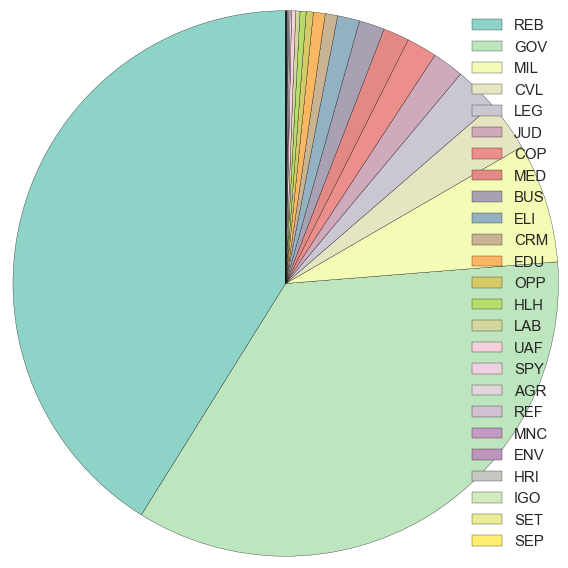

In [15]:
gdeltviz.pieChart(list(ActorType1Codes.keys()), list(ActorType1Codes.values()))

## 1.2 Prominent Actors

<b>The Revolutionary Armed Forces of Colombia—People's Army (Spanish: Fuerzas Armadas Revolucionarias de Colombia—Ejército del Pueblo, FARC–EP and FARC)</b> was a guerrilla movement involved in the continuing Colombian armed conflict since 1964. It was known to employ a variety of military tactics in addition to more unconventional methods, including terrorism. The FARC-EP was formed during the Cold War period as a Marxist–Leninist peasant force promoting a political line of agrarianism and anti-imperialism. The operations of the FARC–EP were funded by kidnap and ransom; illegal mining; extortion or taxation of various forms of economic activity; and the taxation, production, and distribution of illegal drugs.

<b>Juan Manuel Santos Calderón</b> <em>(Spanish: [xwan maˈnwel ˈsantos kaldeˈɾon]; born 10 August 1951)</em>, GColIH is the 32nd and current President of Colombia and sole recipient of the 2016 Nobel Peace Prize.

<b>Álvaro Uribe Vélez (Spanish pronunciation:</b> <em>[ˈalβaɾo uˈɾiβe ˈβeles]; born 4 July 1952)</em> is a Colombian politician who served as the 31st President of Colombia from 7 August 2002 to 7 August 2010.

<b>Juan Camilo Restrepo Salazar</b> <em>(born 19 October 1946)</em> was the 10th Minister of Agriculture and Rural Development of Colombia, serving in the administration of President Juan Manuel Santos Calderón. A veteran politician, he also served as the 63rd Minister of Finance and Public Credit of Colombia, the 17th Minister of Mines and Energy of Colombia, the 20th Ambassador of Colombia to France, and as Senator of Colombia. A lifelong member of the Conservative Party, he tried to run for the Conservative presidential nomination in 1998 and 2002, ultimately losing in the primaries both times.

<b>Martha Lucía Ramírez Blanco</b> <em>(born 4 July 1954)</em> is a Colombian lawyer and politician. Elected Senator of Colombia in 2006, Ramírez introduced legislative initiatives to permit women to attain the rank of General in the Military Forces of Colombia, and to mandate English teaching in schools. Ramírez was Colombia’s first female Minister of National Defence, serving from 2002 to 2003 in the administration of President Álvaro Uribe Vélez, and the second woman in Latin America to hold this title. She has also served as the 6th Minister of Foreign Trade of Colombia, from 1998 to 2002.

<b>Juan Carlos Echeverry Garzón</b> <em>(born 12 September 1962)</em> is a Colombian economist and the president of Ecopetrol, an oil and gas company. He served as the 68th Minister of Finance and Public Credit of Colombia. He is the president of Econcept, a financial consulting firm in Bogotá and is an Associate Professor of Economics at University of the Andes. He was also a visiting professor at IE Business School, Madrid in 2013. He served as Colombia’s Minister of Economic Planning from 2000 to 2002 and held the position of Dean of Economics at the University of the Andes from 2002-2006. He was appointed finance minister by Colombia's President-elect Juan Manuel Santos on June 22, 2010.

<b>María Ángela Holguín Cuéllar</b> <em>(born 13 November 1963)</em> is the Minister of Foreign Affairs of Colombia. She has also served as the 25th Permanent Representative of Colombia to the United Nations, and as Ambassador of Colombia to Venezuela.

<b>Francisco Santos Calderón</b> <em>(born October 14, 1961 in Bogotá)</em>, also known as Pacho Santos, is a Colombian politician and journalist. Santos was elected as Álvaro Uribe's second runner up and became Vice President in the Colombian elections of 2002. Santos was re-elected in the presidential elections of 2006 for a second term once again with President Uribe to continue as Vice President of Colombia. His great-uncle Eduardo Santos was President of Colombia from 1938 to 1942 and the current president of Colombia (Juan Manuel Santos) is his cousin.

<b>Germán Vargas Lleras</b> <em>(born February 19, 1962)</em> is a Colombian politician who recently served as the 25th Vice President of Colombia under President Juan Manuel Santos Calderón. A member of the Radical Change political party, he served four consecutive terms in the Senate, having been elected in 1994. German Vargas also served in the Cabinet as the Minister of Interior and then as the Minister of Housing, City and Territory. He was elected Vice President of Colombia in 2014, running alongside Juan Manuel Santos who was seeking re-election for a second term as President. On the 15th of March 2017, Vargas Lleras resigned as Vice President in order to be eligible to run for President in the 2018 Presidential elections.

In [17]:
ActorNames = gdeltxp.actorNames(all_events)
print(ActorNames)

OrderedDict([('FARC', 14128), ('JUAN MANUEL SANTOS', 1602), ('ALVARO URIBE VELEZ', 48), ('JUAN CAMILO RESTREPO', 35), ('MARTA LUCIA RAMIREZ', 7), ('JUAN CARLOS ECHEVERRY', 6), ('REVOLUTIONARY ARMED FORCES OF COLUMBIA', 4), ('FRANCISCO SANTOS', 4), ('MARIA ANGELA HOLGUIN CUELLAR', 4), ('GERMAN VARGAS LLERAS', 2)])


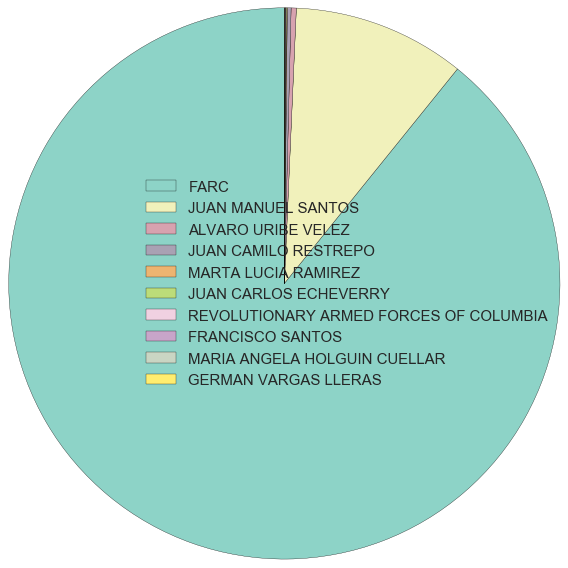

In [18]:
gdeltviz.pieChart(list(ActorNames.keys()), list(ActorNames.values()))

## 1.3 Actor Stability

In [19]:
dates = sorted([key for key in Counter(all_events['SQLDATE']).keys()])

# Filter DataFrame by Actor1Name
farc1 = [np.sum(all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'FARC', 'GoldsteinScale']) for date in dates] 
santos1 = [np.sum(all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'JUAN MANUEL SANTOS', 'GoldsteinScale']) for date in dates]
uribe1 = [np.sum(all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'ALVARO URIBE VELEZ', 'GoldsteinScale']) for date in dates] 

# Filter DataFrame by Actor2Name
farc2 = [np.sum(all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'FARC', 'GoldsteinScale']) for date in dates]
santos2 = [np.sum(all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'JUAN MANUEL SANTOS', 'GoldsteinScale']) for date in dates]
uribe2 = [np.sum(all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'ALVARO URIBE VELEZ', 'GoldsteinScale']) for date in dates] 

# Create x-axis index, set window size
ind, window = np.arange(len(dates)), 1

# Finalize plotting variables
farc_stability = gdeltxp.movingAverage([farc1[i] + farc2[i] for i in range(len(farc1))], window)
santos_stability = gdeltxp.movingAverage([santos1[i] + santos2[i] for i in range(len(santos1))], window)
uribe_stability = gdeltxp.movingAverage([uribe1[i] + uribe2[i] for i in range(len(uribe1))], window)

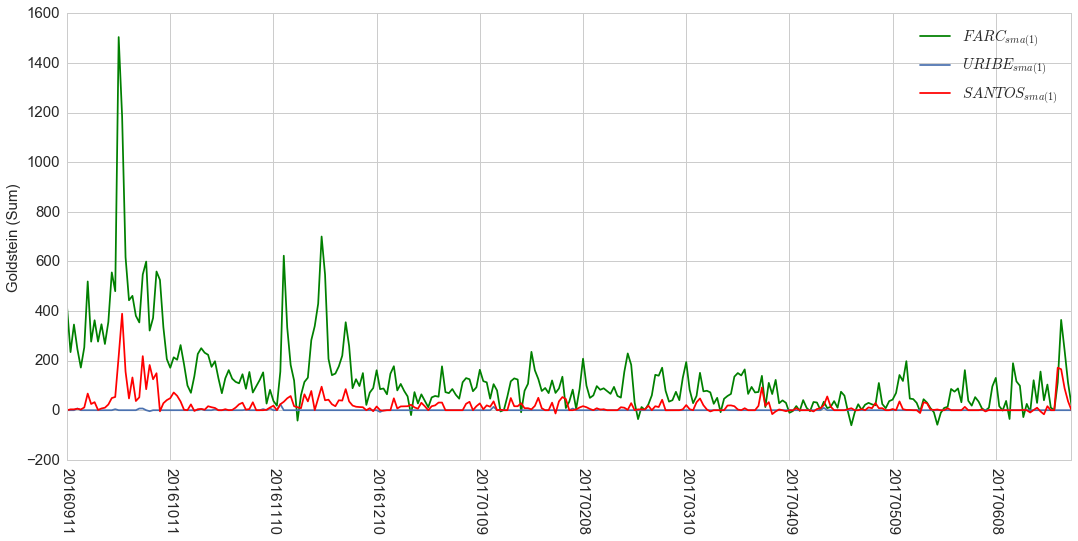

In [20]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Goldstein (Sum)' , fontsize=15)
ax.set_xticks(np.arange(0, len(dates), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
ax.set_xticklabels(dates[::30])
plt.plot(ind[len(dates)-len(farc_stability):], farc_stability, label='$FARC_{sma(%s)}$'%window, c='g')
plt.plot(ind[len(dates)-len(uribe_stability):], uribe_stability, label='$URIBE_{sma(%s)}$'%window)
plt.plot(ind[len(dates)-len(santos_stability):], santos_stability, label='$SANTOS_{sma(%s)}$'%window, c='r')
plt.legend(loc='best', fontsize=15)
plt.show()

# 1.4 Actor Tone

In [21]:
# Filter DataFrame by Actor1Name
farc1 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'FARC', 'AvgTone'].sum() for date in dates]
santos1 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'JUAN MANUEL SANTOS', 'AvgTone'].sum() for date in dates]
uribe1 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'ALVARO URIBE VELEZ', 'AvgTone'].sum() for date in dates]

# Filter DataFrame by Actor2Name
farc2 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'FARC', 'AvgTone'].sum() for date in dates]
santos2 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'JUAN MANUEL SANTOS', 'AvgTone'].sum() for date in dates]
uribe2 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'ALVARO URIBE VELEZ', 'AvgTone'].sum() for date in dates]

# Create x-axis index, set window size
ind, window = np.arange(len(dates)), 1

# Finalize plotting variables
farc_tone = gdeltxp.movingAverage([farc1[i] + farc2[i] for i in range(len(farc1))], window)
santos_tone = gdeltxp.movingAverage([santos1[i] + santos2[i] for i in range(len(santos1))], window)
uribe_tone = gdeltxp.movingAverage([uribe1[i] + uribe2[i] for i in range(len(uribe1))], window)

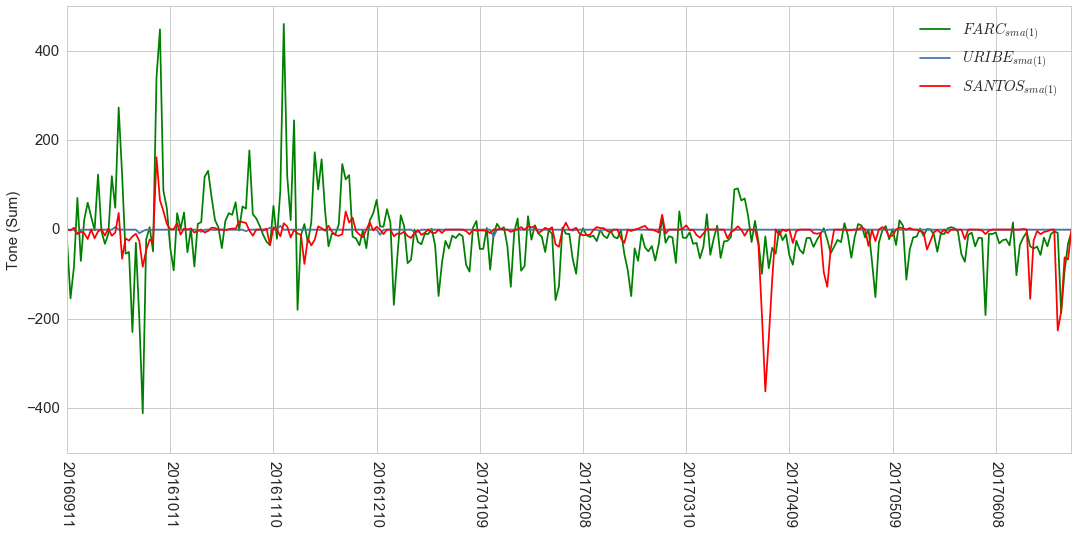

In [22]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Tone (Sum)' , fontsize=15)
ax.set_xticks(np.arange(0, len(dates), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
ax.set_xticklabels(dates[::30])
plt.plot(ind[len(dates)-len(farc_tone):], farc_tone, label='$FARC_{sma(%s)}$'%window, c='g')
plt.plot(ind[len(dates)-len(uribe_tone):], uribe_tone, label='$URIBE_{sma(%s)}$'%window)
plt.plot(ind[len(dates)-len(santos_tone):], santos_tone, label='$SANTOS_{sma(%s)}$'%window, c='r')
plt.legend(loc='best', fontsize=15)
plt.show()

## 1.5 Actor Correlation

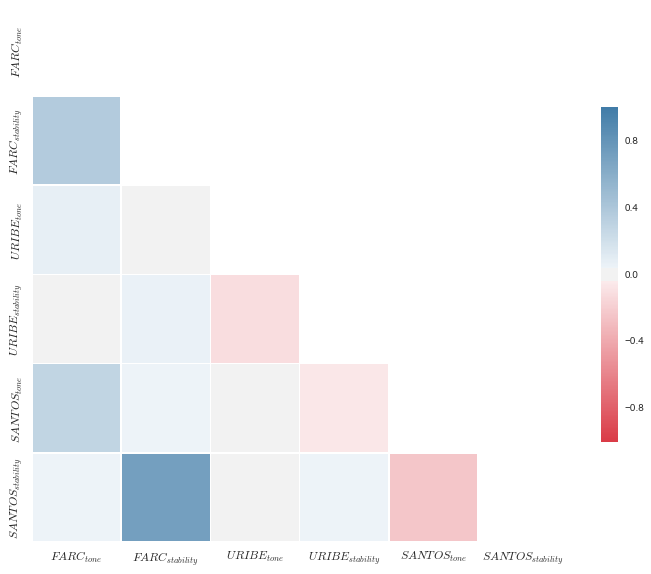

In [23]:
actor_df = pd.DataFrame()
actor_df['$FARC_{tone}$'] = farc_tone
actor_df['$FARC_{stability}$'] = farc_stability
actor_df['$URIBE_{tone}$'] = uribe_tone
actor_df['$URIBE_{stability}$'] = uribe_stability
actor_df['$SANTOS_{tone}$'] = santos_tone
actor_df['$SANTOS_{stability}$'] = santos_stability
gdeltviz.heatmap(actor_df)

In [24]:
print(actor_df.corr(method='pearson'))

                      $FARC_{tone}$  $FARC_{stability}$  $URIBE_{tone}$  \
$FARC_{tone}$              1.000000            0.363145        0.071090   
$FARC_{stability}$         0.363145            1.000000       -0.009804   
$URIBE_{tone}$             0.071090           -0.009804        1.000000   
$URIBE_{stability}$       -0.024369            0.056753       -0.116770   
$SANTOS_{tone}$            0.287965            0.042305        0.005781   
$SANTOS_{stability}$       0.042168            0.714113       -0.023315   

                      $URIBE_{stability}$  $SANTOS_{tone}$  \
$FARC_{tone}$                   -0.024369         0.287965   
$FARC_{stability}$               0.056753         0.042305   
$URIBE_{tone}$                  -0.116770         0.005781   
$URIBE_{stability}$              1.000000        -0.057112   
$SANTOS_{tone}$                 -0.057112         1.000000   
$SANTOS_{stability}$             0.043223        -0.236454   

                      $SANTOS_{stabilit